In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
                    

In [3]:
def load_data():
    df_sierraleone = pd.read_csv('data/sierraleone-bumbuna.csv')
    return df_sierraleone

In [4]:
data = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/sierraleone-bumbuna.csv")

In [5]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [7]:
data = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/sierraleone-bumbuna.csv")
df = pd.read_csv('C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/sierraleone-bumbuna.csv', parse_dates=['Timestamp']) 
df.set_index('Timestamp', inplace=True)
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [8]:
import pandas as pd

# Load data
df = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/sierraleone-bumbuna.csv")

# Summary Statistics
print("--- Summary Statistics ---")
print(df[numeric_cols].describe())

# Missing Value Report
missing_report = df.isna().sum().sort_values(ascending=False)
total_rows = len(df)
missing_percentage = (missing_report / total_rows) * 100

print("\n--- Missing Value Percentage ---")
print(missing_percentage)

# Columns with >5% nulls
high_nulls = missing_percentage[missing_percentage > 5].index.tolist()
print(f"\nColumns with >5% nulls: {high_nulls}")


--- Summary Statistics ---
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%   

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import os

# ✅ Load data first
df = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/sierraleone-bumbuna.csv")

# ✅ Make a working copy
df_cleaned = df.copy()

# ✅ Outlier Detection using Z-score
for col in key_cols:
    # Compute Z-scores only on non-null data
    z_scores = np.abs(stats.zscore(df_cleaned[col].dropna()))

    # Outlier indices (Z > 3)
    outlier_indices = df_cleaned[col].dropna().index[z_scores > 3]
    
    # Replace outliers with NaN
    df_cleaned.loc[outlier_indices, col] = np.nan
    print(f"Flagged/Replaced {len(outlier_indices)} outliers in {col}")

# ✅ Missing Value Imputation (Median)
for col in key_cols:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in {col} with median: {median_val}")

# ✅ Drop Comments column if it exists
if 'Comments' in df_cleaned.columns:
    df_cleaned.drop(columns=['Comments'], inplace=True)

# ✅ Dynamically generate clean filename
input_file = "sierraleone-bumbuna.csv"
file_name = os.path.splitext(input_file)[0]  # → "sierraleone-bumbuna"
import os
os.makedirs("data", exist_ok=True)
output_path = f"data/{file_name}_clean.csv"

# ✅ Save cleaned file
df_cleaned.to_csv(output_path, index=False)

print(f"\nCleaned data saved to {output_path}")


Flagged/Replaced 2477 outliers in GHI
Flagged/Replaced 7586 outliers in DNI
Flagged/Replaced 2986 outliers in DHI
Flagged/Replaced 1604 outliers in ModA
Flagged/Replaced 2041 outliers in ModB
Flagged/Replaced 3967 outliers in WS
Flagged/Replaced 3665 outliers in WSgust
Imputed missing values in GHI with median: 0.0
Imputed missing values in DNI with median: -0.1
Imputed missing values in DHI with median: -0.4


C:\Users\natna\AppData\Local\Temp\ipykernel_20856\1652078189.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
C:\Users\natna\AppData\Local\Temp\ipykernel_20856\1652078189.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Imputed missing values in ModA with median: 3.2
Imputed missing values in ModB with median: 2.9
Imputed missing values in WS with median: 0.8
Imputed missing values in WSgust with median: 1.6

Cleaned data saved to data/sierraleone-bumbuna_clean.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset using correct path
df_sierraleone = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/sierraleone-bumbuna.csv")

# Check columns
print(df_sierraleone.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


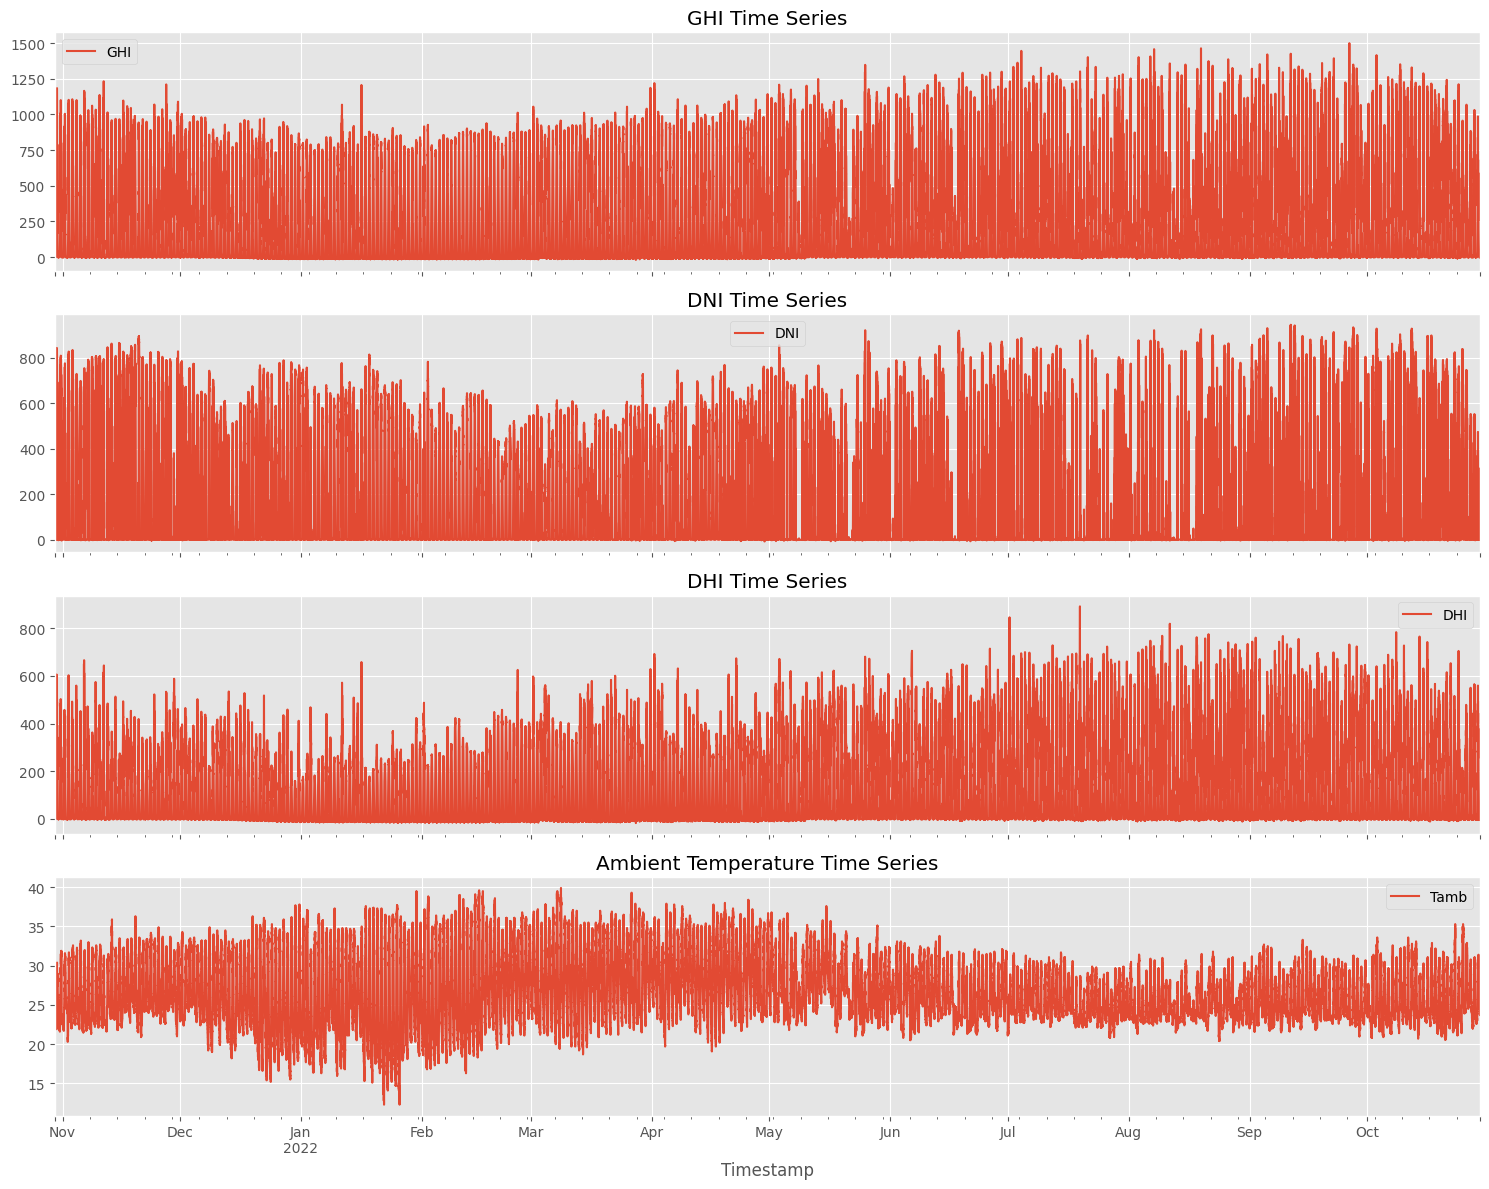

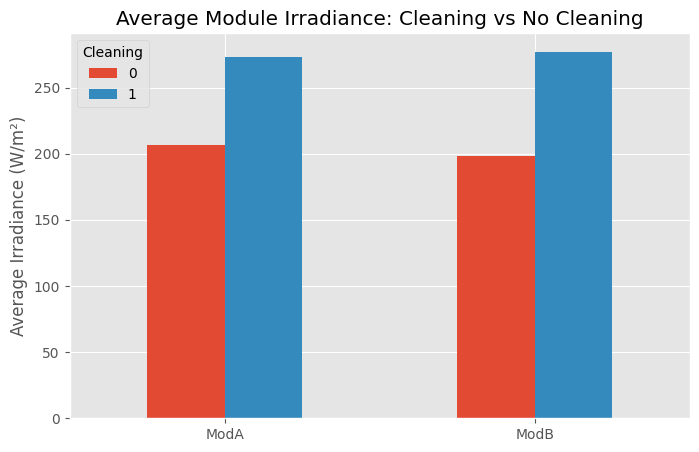

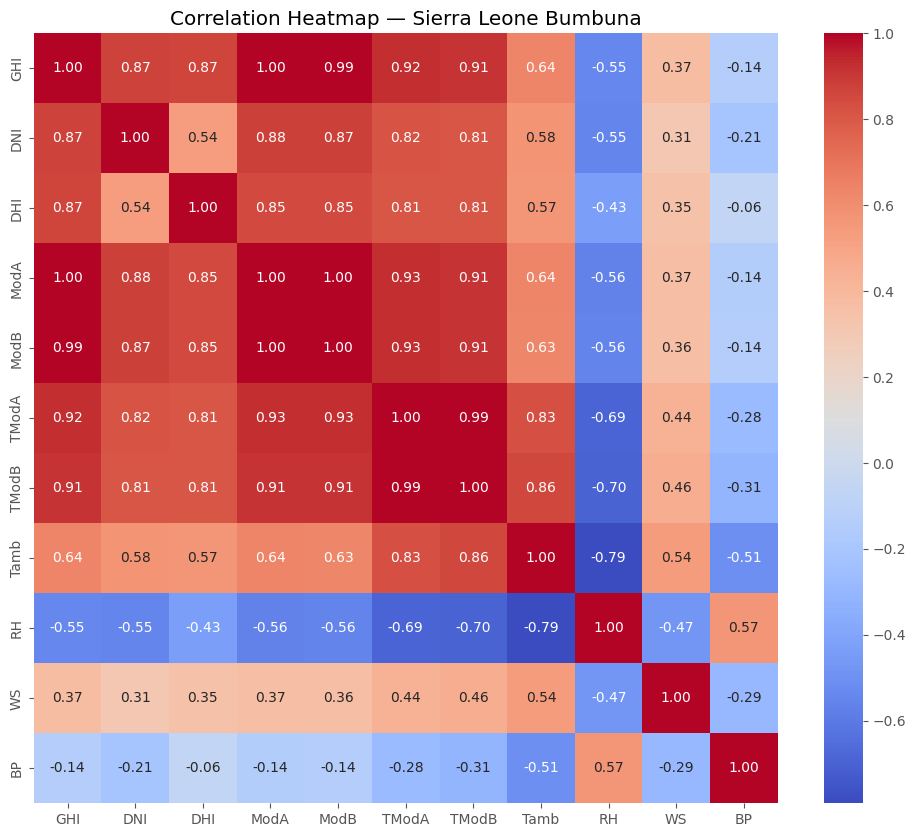

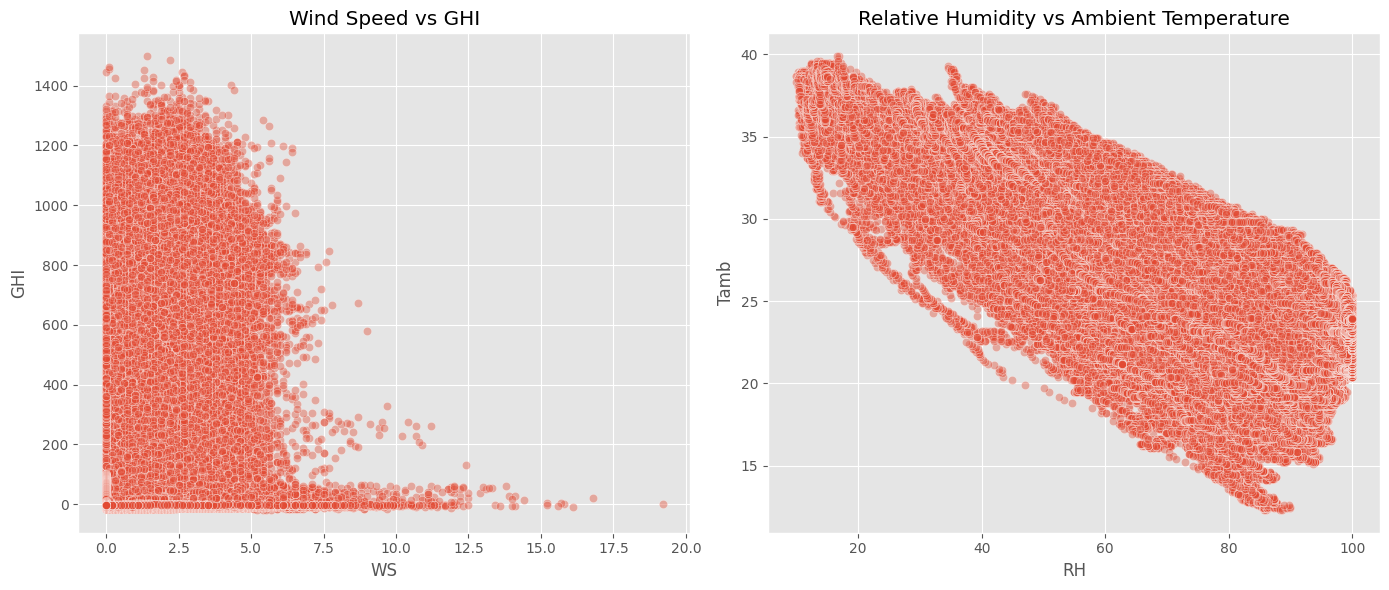

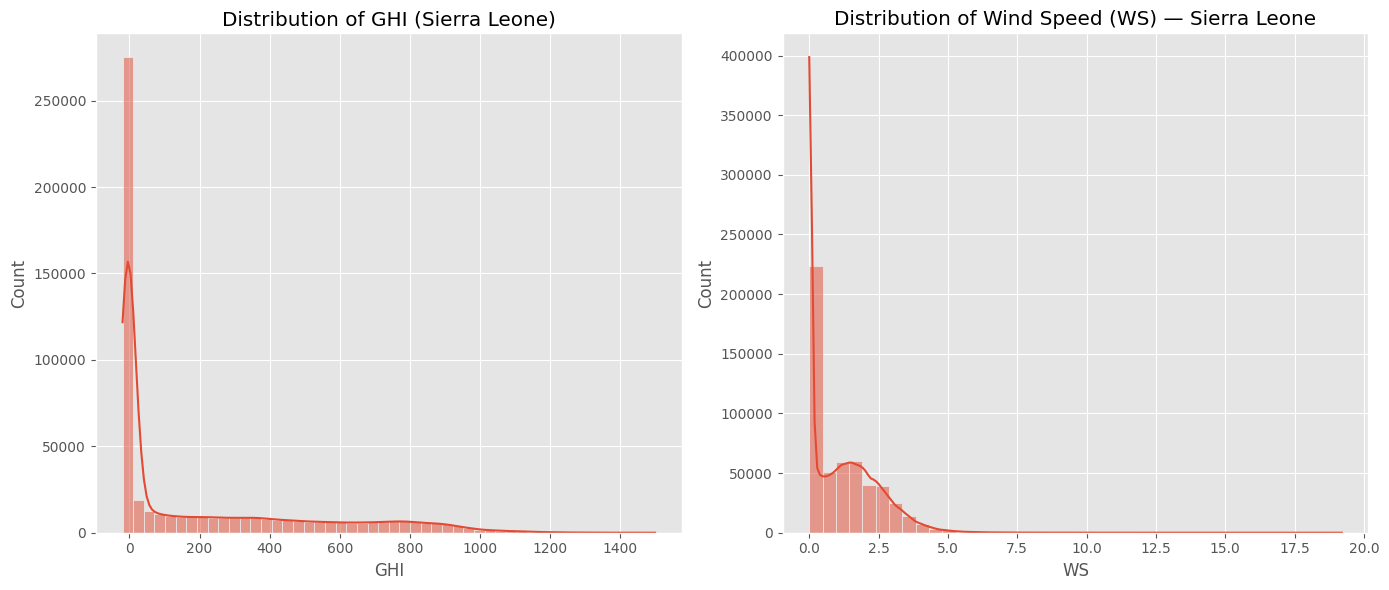

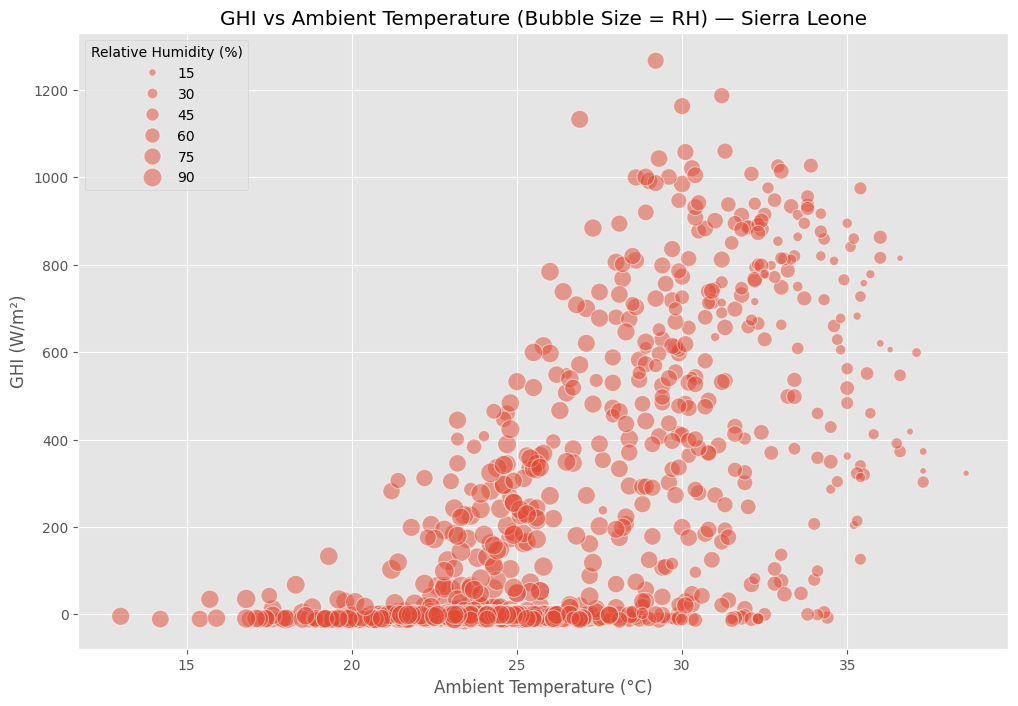

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# ✅ LOAD & PREPARE DATA
# ---------------------------------------------
df_sl = pd.read_csv("C:/Users/natna/Downloads/solar discovery challenge/solar-data-discovery-week-0-challenge-/data/sierraleone-bumbuna.csv")

# Convert Timestamp to datetime and set as index
df_sl['Timestamp'] = pd.to_datetime(df_sl['Timestamp'])
df_sl.set_index('Timestamp', inplace=True)

plt.style.use("ggplot")

# ---------------------------------------------
# ✅ TIME SERIES PLOTS (GHI, DNI, DHI, Tamb)
# ---------------------------------------------
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

df_sl[['GHI']].plot(ax=axes[0], title='GHI Time Series')
df_sl[['DNI']].plot(ax=axes[1], title='DNI Time Series')
df_sl[['DHI']].plot(ax=axes[2], title='DHI Time Series')
df_sl[['Tamb']].plot(ax=axes[3], title='Ambient Temperature Time Series')

plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ CLEANING IMPACT (Cleaning column exists)
# ---------------------------------------------
cleaning_impact = df_sl.groupby('Cleaning')[['ModA', 'ModB']].mean()

cleaning_impact.T.plot(
    kind='bar',
    figsize=(8, 5),
    title='Average Module Irradiance: Cleaning vs No Cleaning'
)

plt.xticks(rotation=0)
plt.ylabel('Average Irradiance (W/m²)')
plt.show()

# ---------------------------------------------
# ✅ CORRELATION HEATMAP
# ---------------------------------------------
corr_vars = [
    'GHI','DNI','DHI','ModA','ModB','TModA','TModB',
    'Tamb','RH','WS','BP'
]

corr_vars = [col for col in corr_vars if col in df_sl.columns]

plt.figure(figsize=(12, 10))
sns.heatmap(df_sl[corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Sierra Leone Bumbuna")
plt.show()

# ---------------------------------------------
# ✅ SCATTER PLOTS
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='WS', y='GHI', data=df_sl, alpha=0.4, ax=axes[0])
axes[0].set_title("Wind Speed vs GHI")

sns.scatterplot(x='RH', y='Tamb', data=df_sl, alpha=0.4, ax=axes[1])
axes[1].set_title("Relative Humidity vs Ambient Temperature")

plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ HISTOGRAMS for GHI & WS
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_sl['GHI'].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of GHI (Sierra Leone)")

sns.histplot(df_sl['WS'].dropna(), bins=40, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Wind Speed (WS) — Sierra Leone")

plt.tight_layout()
plt.show()

# ---------------------------------------------
# ✅ BUBBLE CHART (GHI vs Tamb with RH bubble size)
# ---------------------------------------------
plt.figure(figsize=(12, 8))

sample_df = df_sl.sample(n=1000, random_state=42) if len(df_sl) > 1000 else df_sl

sns.scatterplot(
    x='Tamb', 
    y='GHI', 
    size='RH',
    sizes=(20, 200),
    alpha=0.5,
    edgecolor='white',
    data=sample_df
)

plt.title("GHI vs Ambient Temperature (Bubble Size = RH) — Sierra Leone")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.legend(title="Relative Humidity (%)")
plt.show()
